# Today we'll try to think about how to build trees, focusing on parameter estimation

- Page from Darwin's notebooks around July 1837 showing his first sketch of an evolutionary tree.

In [3]:
from IPython.core.display import Image 
from IPython.display import Math,Latex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Ideas borrowed from http://treethinkers.org/jukes-cantor-model-of-dna-substitution/

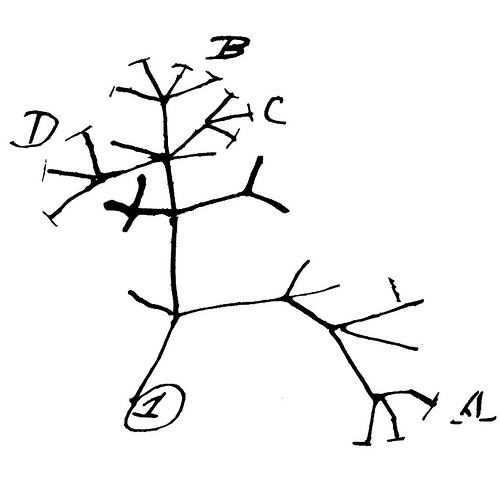

In [4]:
Image(filename='media/darwin_tree.jpg')

In [7]:
## Going from alignment to phylogeny

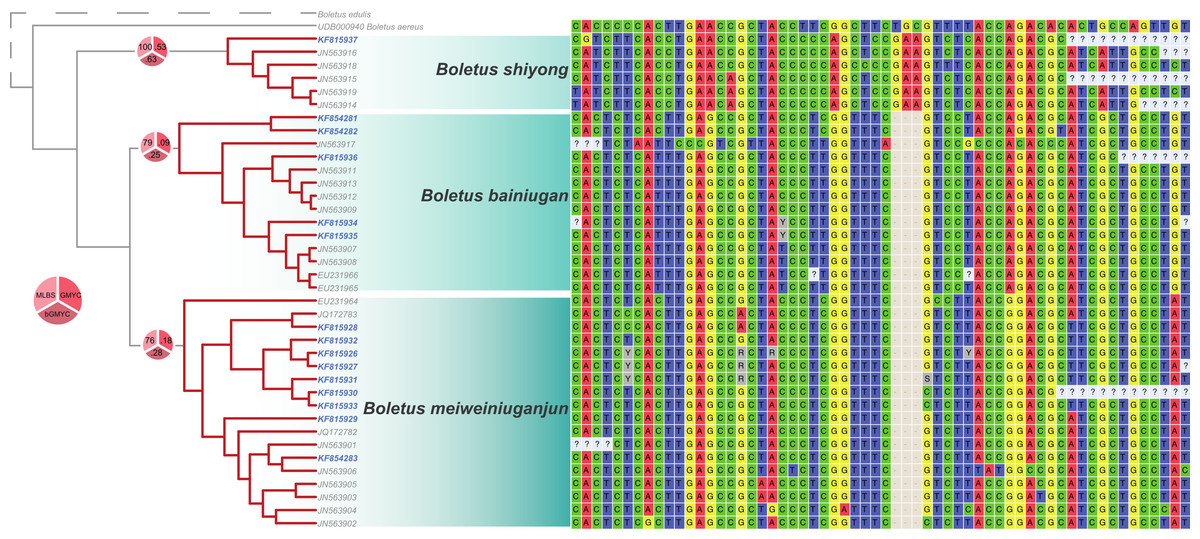

In [6]:
Image('https://dfzljdn9uc3pi.cloudfront.net/2014/570/1/fig-1-2x.jpg')

From Dentinger and Suz: "What’s for dinner? Undescribed species of porcini in a commercial packet", PeerJ 2014

## Jukes-Cantor (1969) model of DNA substitution

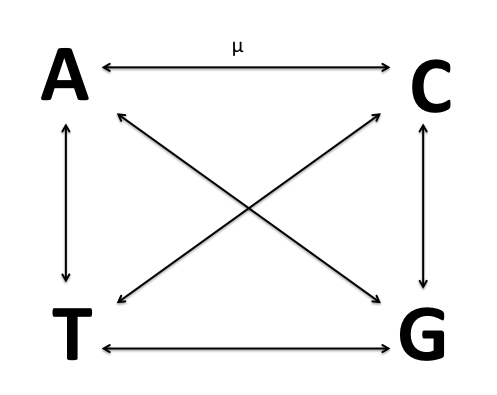

In [3]:
Image(filename='media/jc.png')

-  What is the probability of moving from A to a given state?
- What is the probability of moving toward A from any given state?
- What is the frequency of A at equilibrium?

- Mutations are reversible
- u is the probability of moving from one state to the other

Now, let's review the Poisson distribution

\begin{equation}
P\left( k|\lambda \right) = \frac{{e^{ - \lambda } \lambda ^k }}{{k!}}
\end{equation}

We are especially interested in the probability that *nothing* happens at all

\begin{equation}
P\left( 0|\lambda \right) = e^{ - \lambda } 
\end{equation}

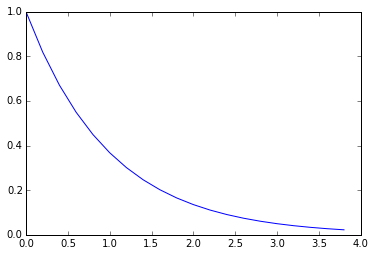

In [4]:
plt.plot(np.arange(0,4,.2),map(lambda x: exp(-1*x), np.arange(0,4,.2)))

The total probability must sum to 1, so the probability of *anything* happening is

\begin{equation}
P\left( \neg 0|\lambda \right) = 1 - P\left( 0|\lambda \right) = 1 - e^{ - \lambda } 
\end{equation}

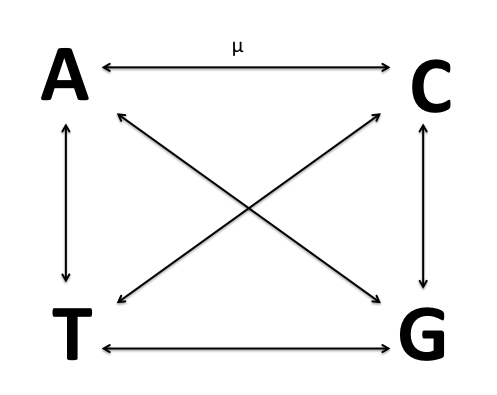

In [10]:
Image(filename='media/jc.png')

\begin{equation}
\lambda  = 4 \mu t
\end{equation}

Let's consider the amount of genetic change between two lineages since a split *t* time ago

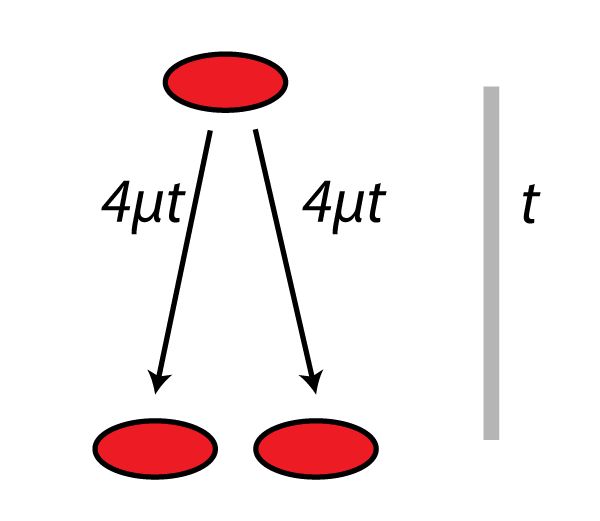

In [12]:
Image("media/inheritance-lineage-2t.png")

So, the expected amount of divergence between two species that share a common ancestor *t* ago

\begin{equation}
\lambda  = 8 \mu t
\end{equation}

The probability of a DNA site not having a mutation in either species is 

\begin{equation}
P\left( 0 |\mu, t \right) = e^{ - 8 \mu t  } 
\end{equation}

Probability of at least one change

\begin{equation}
1 - P\left( 0 |\mu, t \right) = 1 - e^{ - 8 \mu t  } 
\end{equation}

The probability that the same site is different between two species is the probability that a change has occured, scaled by the probability that the change was to a different nucleotide.

\begin{equation}
P\left( different |\mu, t \right) = \frac{3}{4}(1 -  e^{ - 8 \mu t  } )
\end{equation}
As t $\rightarrow \infty $
\begin{equation}
P\left( different |\mu \right) \rightarrow \frac{3}{4}
\end{equation}

plugging in a more relaistic mutation rate, $10^{-8}$, we get the following plot

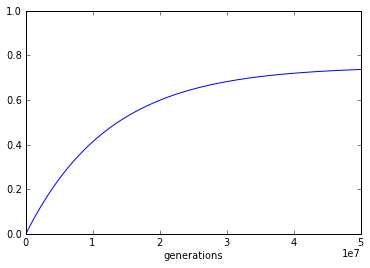

In [18]:
ylim([0, 1])
xlim([0,5*10**7])
def d(x):
    return 3/4.0*(1-exp(-8*x*10**-8))
plt.plot(np.arange(0, 5*10**7, 10**4), map(d,np.arange(0, 5*10**7, 10**4)))
plt.xlabel('generations')

What does this plot tell us about the strength of phylogenetic signal in DNA over time?

We now have an expression for the fraction of nucleotides different as a function of time
$$d = \frac{3}{4}(1 -  e^{ - 8 \mu t  } )$$
But what we really want is a distance measure that scales linearly with time

We can set $D = \mu t$, and solve for $D$

$ D = - \frac{1}{8} ln(1-\frac{3}{4} d) $

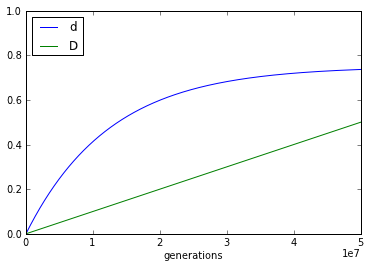

In [22]:
def D(x):
    return -1/8.0*log(1-4/3.0*d(x))
ylim([0, 1])
xlim([0,5*10**7])
plt.plot(np.arange(0, 5*10**7, 10**4), map(d,np.arange(0, 5*10**7, 10**4)))
plt.plot(np.arange(0, 5*10**7, 10**4), map(D,np.arange(0, 5*10**7, 10**4)))
plt.xlabel('generations')
plt.legend(['d','D'],loc=2)

We can now compute a corrected Jukes-Cator distance, given a proportion of differences between two sequences

## What are the properties of an DNA substitution model?

- Lack of memory
  - Change from one state does not depend on previous states
- Reversibility 
  - You can always go back to the previous state

## More complex models

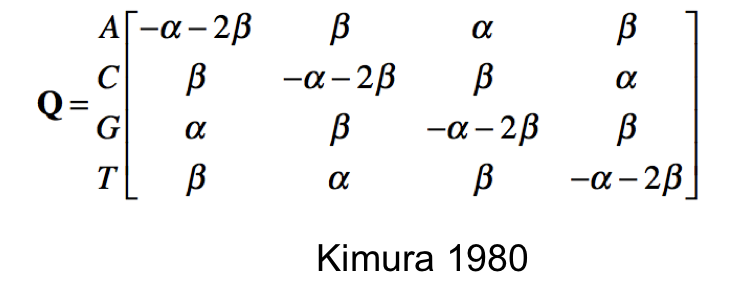

In [23]:
Image("media/Kimura80.png")

- distinguishes between transitions and transversions

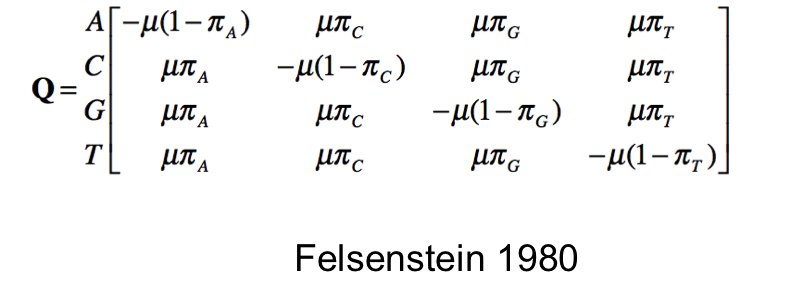

In [24]:
Image("media/felsenstein80.png")

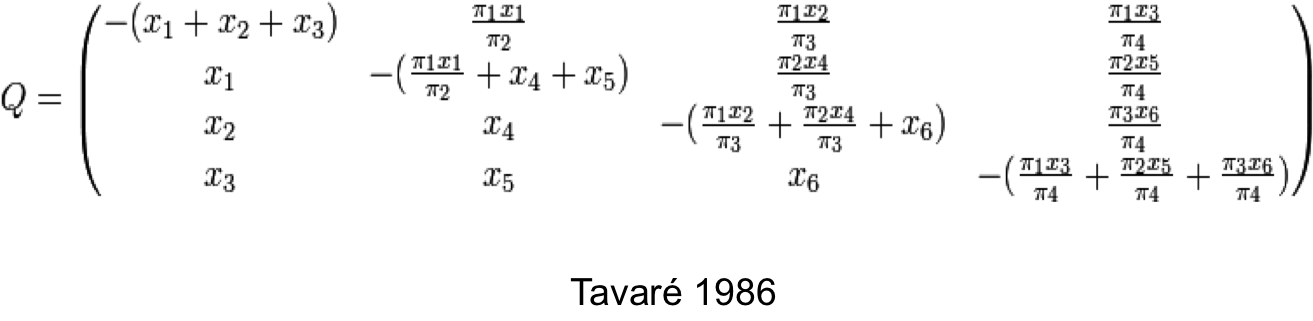

In [25]:
Image("media/tavare1986.png")

- GTR: Generalised time reversible model
- 8 free parameters

- There are several ~ 50 model variants to choose from
- You can also have codon-based that model transitions between the 20 standard amino acids
  - many parameters (4^3 == 64 codons, with 2078 free parameters)
   - 632 parameters, assuming transition probabilities for amino acids with more than one nucleotide difference == 0

- different models have different numbers of parameters, and will not necessarily give you the same answer
- model choice is important

## Computing tree likelihoods
  - a simple model with two sites

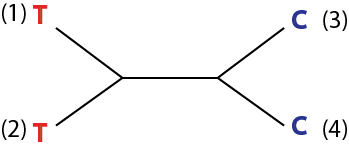

In [31]:
Image("media/tree likelihood.png")

The likelihood of a tree is the product of the likelihood of each site
$$ L = \prod_{k=1}^K L _{j} $$
or 
$$ log(L) = \sum_{k=1}^K log(L _{j})$$

# Computing likelihoods for trees


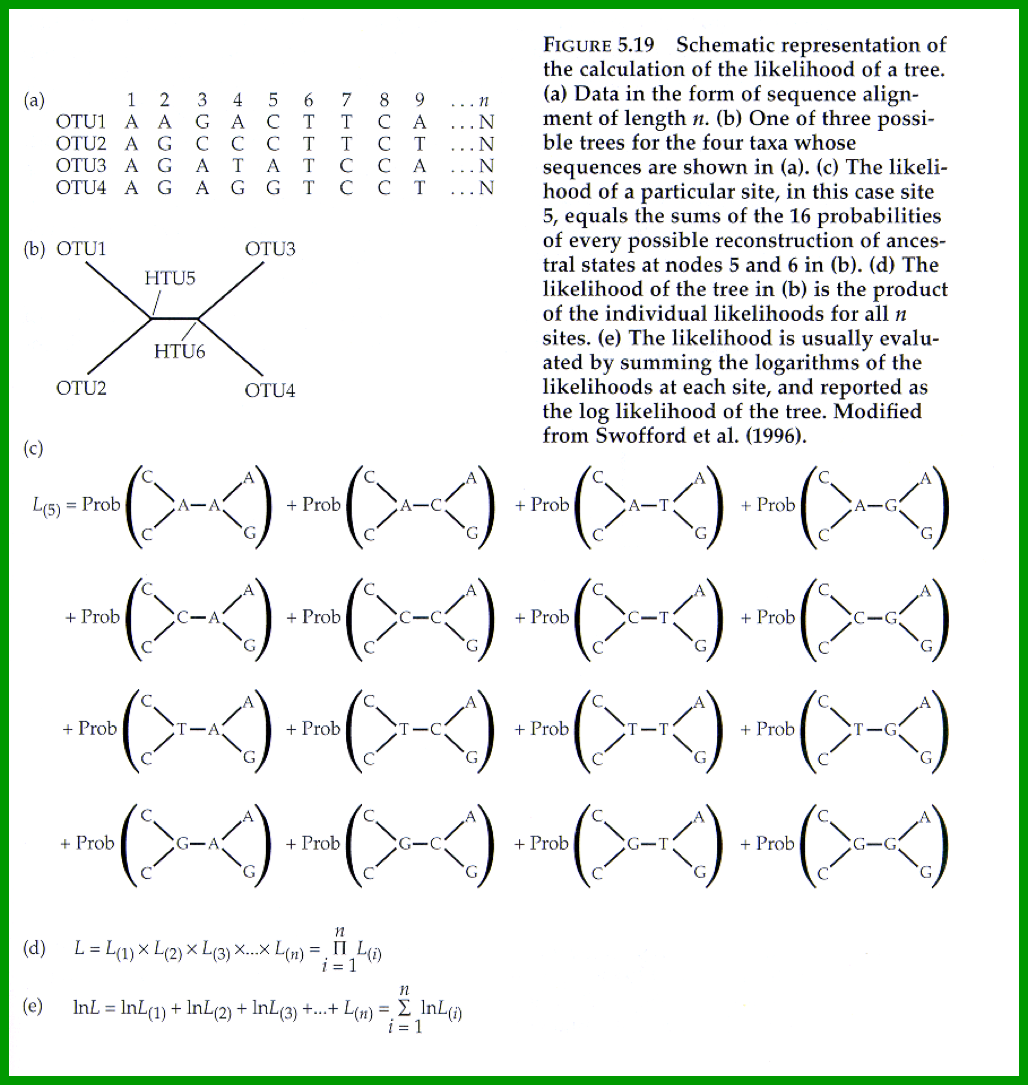

In [5]:
Image("media/tree likelihood computation.png")

### How can we choose between possible models?

- We can compute the likelihoods of the same tree under different models 
- Use likelihood ratio tests or Bayesian methods to distinguish which ones fit best